In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Stochastic Differential Equations


## ODEs - A very brief recap

Ordinary differential equations (ODEs) are equations that describe how some variable changes in time. They are usually written like this:

$$ \dot{x} = f(x, t), $$

where $\dot{x} = \mathrm{d}x/\mathrm{d}t$. To solve such an equation means to find $x(t)$, given the ODE and an initial condition, $x(t=0) = x_0$. We can write the solution as

$$ x(t) = x_0 + \int_0^t f(x, t) \, \mathrm{d}t, $$

although in practice we often use numerical ODE methods to solve such equations.


## SDEs

Stochastic differential equations are also equations that describe how some variable changes in time, but where the change has a random component. SDEs are usually written like this:

$$ \mathrm{d} X_t = a(X_t, t) \, \mathrm{d}t + b(X_t, t) \, \mathrm{d}W_t, $$

Here:
* $a(X_t, t)$ is called the drift term.
* $b(X_t, t)$ is called the diffusion term, or noise term.
* $\mathrm{d}t$ are infinitesimal time increments.
* $\mathrm{d}W_t$ are the infinitesimal increments of the standard Wiener process.

We will get back to what this means in practice, but for now we can just remember the definition of the Wiener process in terms of its Gaussian increments, and think of $\mathrm{d}W_t$ as Gaussian random numbers with $\mu=0$ and $\sigma^2=\mathrm{d}t$.

Due to the random contribution, $X$ will not be a regular function, but a stochastic process, and we use the notation $X_t$ for $X$ as a function of time. As for ODEs, to solve an SDE means to find how $X_t$ develops in time, given an initial condition, $X_{t=0} = X_0$.

The SDE as written above is really short-hand notation for an integral equation, given by

$$ X_t = X_0 + \int_0^t  a(X_s, s) \, \mathrm{d}s + \int_0^t b(X_s, s) \, \mathrm{d}W_s. $$

Here, the first integral (with respect to $\mathrm{d} s$) is a Lebesgue integral, and the second integral (with respect to $\mathrm{d} W_s$) is a stochastic integral known as an Itô-integral. There is also another type of stochastic integrals, called Stratonovich-integrals, and they are usually written

$$ \int_0^t b(X_s, s) \circ \mathrm{d}W_s. $$

We will deal only with Itô-integrals in this course, but we will briefly look at the difference between the two types.

## Regular integrals (Riemann integrals)

The value of a regular, definite integral is given by the limit of a Riemann sum with infinitesimal intervals:

$$ \int_{a}^{b} f(x) \, \mathrm{d}x = \lim_{\Delta x \to 0 \\ N \to \infty} \sum_{i=1}^N \Delta x \, f(x^*_i) \;\;\;\mathrm{where}\;\;\; x_i = x_0 + i \Delta x \;\;\;\mathrm{and}\;\;\; x_{i-1} \leq x^*_i \leq x_i \;\;\;\mathrm{and}\;\;\; x_0 = a \;\;\;\mathrm{and}\;\;\; \Delta x = \frac{b - a}{N}.$$

* We want the integral on the interval from $a$ to $b$.
* We subdivide the interval into $N$ subintervals, of equal length $\Delta x$.
* We evaluate the function $f(x)$ at *__any__* point $x^*_i$ inside each subinterval.
* The value $\Delta x \, f(x^*_i)$ approximates the area under the function on each subinterval by a rectangle.
* In the limit where $N \to \infty$ and $\Delta x \to 0$ (in such a way that $\Delta x = \frac{b -a}{N}$), the sum is equal to the integral.

The main point to note is that it doesn't matter which $x_i^*$ we choose to evaluate $f(x)$ at, as long as $x_{i-1} \leq x^*_i \leq x_i$: The result will be the same when we take the limit.

(Though the rate of convergence will be different: The left and right Riemann sums are first-order, while the midpoint method is second order.)


## Stochastic integrals

We can define stochastic integrals in a similar way, but it turns out that it matters which point we choose to evaluate the function. A common choice is to use the left-hand point on each interval: $t_i^* = t_{i-1}$. This is called the Itô integral:

$$\int_0^t b(X_s, s) \, \mathrm{d}W_s = \lim_{\Delta t \to 0 \\ N \to \infty} \sum_{i=1}^N \, b(X_{t_{i-1}}, t_{i-1}) \,\big(W_{t_i} - W_{t_{i-1}}\big).$$

An alternative is to use the midpoint, $t_i^* = \frac{t_i + t_{i-1}}{2}$. This is called the Stratonovich integral:

$$\int_0^t b(X_s, s) \circ \mathrm{d}W_s = \lim_{\Delta t \to 0 \\ N \to \infty} \sum_{i=1}^N \, b\left(\frac{X_{t_{i}}+X_{t_{i-1}}}{2}, \frac{t_i + t_{i-1}}{2} \right) \,\big(W_{t_i} - W_{t_{i-1}}\big).$$

In a sense, we can say that the Itô integral only uses available information at present, since it steps from $t_{i-1}$ to $t_i$ using only the value of $X_{t_{i-1}}$, while the Stratonovich integral looks into the future, as it uses also the value of $X_{t_{i}}$.

Some points to be aware of:
* In general, the Itô and Stratonovich interpretations of stochastic integrals give different answers.
* In some cases, they give the same answer.
* There are rules for converting an Itô integral to a Stratonovich integral, and vice versa.
* There are different numerical methods for the two different types of integrals.

For the rest of the course, we will deal (mainly) with Itô integrals.

## A  very simple example of an analytical solution

First, note:
* When talking about SDEs, analytical solutions are valid for a given realisation of $W_t$.
* For a given realisation of $W_t$, the solution is given by an analytical expression.
* Different realisation of $W_t$ will in general give different answers.

Consider a very simple SDE:
$$ \mathrm{d} X_t = a \, \mathrm{d}t + b \, \mathrm{d}W_t, $$
where the drift and diffusion terms, $a$ and $b$, are constants.

Note that if $b=0$, this is just the ODE $\dot{x} = a$, which has solution $x(t) = x_0 + at$. Hence we would expect the solution of the SDE to be a straight line with some additional random fluctuations.

For this simlpe case, we can use the definition of the Itô integral directly for the noise term, and a regular integral for the drift term, and we get

\begin{align}
X_t = X_0 + \int_0^t a \, \mathrm{d}s + \int_0^t b \, \mathrm{d}W_s &= X_0 + \lim_{\Delta t \to 0 \\ N \to \infty} \sum_{i=1}^N a \Delta t +  \lim_{\Delta t \to 0 \\ N \to \infty} \sum_{i=1}^N \, b \,\big(W_{t_i} - W_{t_{i-1}}\big).
\end{align}

Using that

$$\lim_{\Delta t \to 0 \\ N \to \infty} \sum_{i=1}^N \Delta t = t,$$

and 

$$\lim_{\Delta t \to 0 \\ N \to \infty} \sum_{i=1}^N \big(W_{t_i} - W_{t_{i-1}}\big) = W_t,$$

where in both cases the limit should be taken such that $N \Delta t = t$, we get

$$  X_t = X_0 + a t + b W_t.$$

We recall from last time that the expectation value of the Wiener process is zero, $E(X_t) = 0$, since it is symmetrically distributed about 0. Hence, we see that we have $E(X_t) = at$.


Below, we plot $X_t$ for some realisations of $W_t$, along with the expectation value.

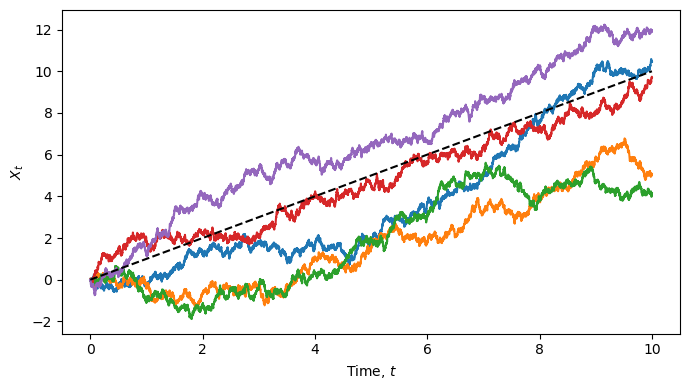

In [2]:
# Drift and diffusion coefficients
a = 1
b = 1
# Initial value
X0 = 0

dt = 0.001
Tmax = 10
Nt = int(Tmax/dt)+1
Np = 5 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Wiener process:
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Plot the solution for the different realisations
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X0 + a*t[:,None] + b*W)
# Plot expectation value
plt.plot(t, X0 + a*t, '--', c='k')
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

We note that this is just a scaled and shifted variant of the Wiener process. At each time, $t$, the distribution of solutions is a Gaussian, with mean $at$ and variance $bt$:

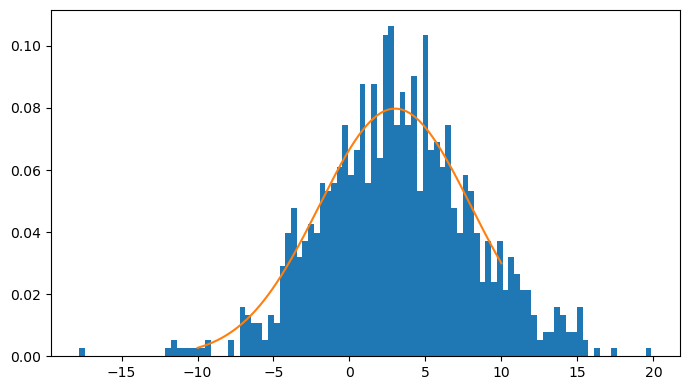

In [3]:
# Drift and diffusion coefficients
a = 2
b = 5
# Initial value
X0 = 1

dt = 0.001
Tmax = 10
Nt = int(Tmax/dt)+1
Np = 1000 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Wiener process:
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Plot the distribution for some time
fig = plt.figure(figsize = (7, 4))

# Plot histogram
it = 1000
plt.hist(X0 + (a*t[:,None] + b*W)[it,:], bins=100, density=True)
# Plot Gaussian distribution
x = np.linspace(-Tmax, Tmax, 1000)
mu = X0 + a*dt*it
sigma = b*np.sqrt(dt*it)
plt.plot(x, np.exp(-0.5*(x-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma) )

plt.tight_layout()

## A  simple example of an analytical solution

Consider a simple SDE:
$$ \mathrm{d} X_t = a X_t \, \mathrm{d}t + b X_t \, \mathrm{d}W_t. $$
Here, the drift and diffusion terms, $aX_t$ and $bX_t$, are linear in $X_t$.

Note that if $b=0$, this is just the ODE $\dot{x} = ax$, which has solution $x(t) = x_0 \mathrm{e}^{at}$. Hence, we would expect the solution of the SDE to be exponential growth, with some random fluctuations.

To solve this equation, we can use the Itô formula (also known as Itô's lemma), as shown at page 66 in Øksendal (2003). Here we will just state the solution:

$$  X_t = X_0 \, \exp\left( \big(a - \frac{1}{2}b^2\big) t + b W_t\right),$$

and the expectation value is (Øksendal, 2003, p. 67)

$$ E(X_t) = X_0  \mathrm{e}^{at}.$$

Below, we plot $X_t$ for some realisations of $W_t$, along with the expectation value.

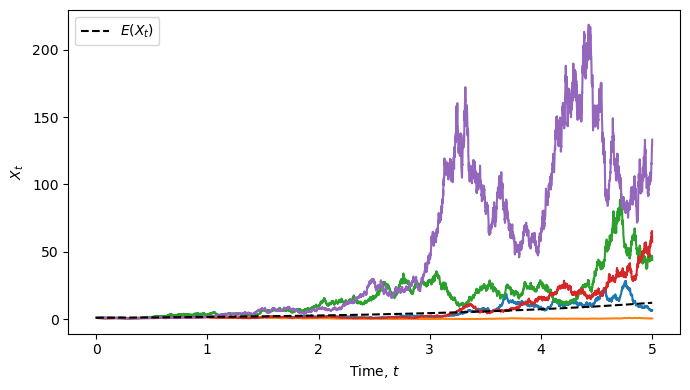

In [4]:
# Drift and diffusion prefactors
a = 1
b = 1
# Initial value
X0 = 1

dt = 0.001
Tmax = 5
Nt = int(Tmax/dt)+1
Np = 5 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Wiener process:
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Plot the solution for the different realisations
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X0 * np.exp((a-b**2/2)*t[:,None] + b*W))
# Plot expectation value
plt.plot(t, X0*np.exp((a-b**2/2)*t), '--', c='k', label='$E(X_t)$')
plt.legend()
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

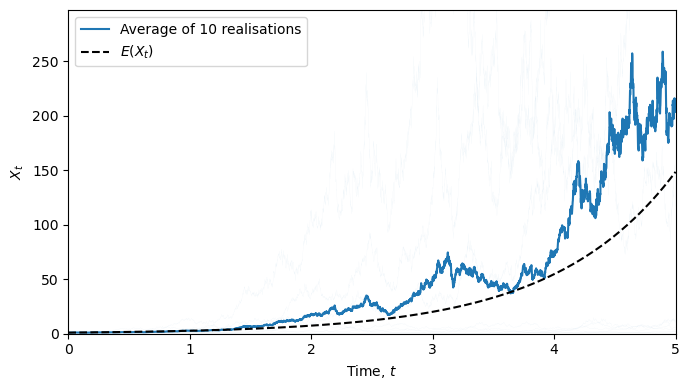

In [5]:
# Drift and diffusion prefactors
a = 1
b = 1
# Initial value
X0 = 1

dt = 0.001
Tmax = 5
Nt = int(Tmax/dt)+1
Np = 10 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Wiener process:
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Plot the solution for the different realisations
fig = plt.figure(figsize = (7,4))
l, = plt.plot(t, np.mean(X0 * np.exp((a-b**2/2)*t[:,None] + b*W), axis=1), label=f'Average of {Np} realisations')
plt.plot(t, X0 * np.exp((a-b**2/2)*t[:,None] + b*W), lw=0.1, alpha=0.1, c=l.get_color())
# Plot expectation value
plt.plot(t, X0*np.exp(a*t), '--', c='k', label='$E(X_t)$')
plt.legend(loc='upper left')
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.ylim(0, 2*X0*np.exp(a*Tmax))
plt.xlim(0, Tmax)
plt.tight_layout()

# Numerical methods for SDEs

The simplest numerical method for ODEs is the (forward) Euler method. Given an ODE,

$$ \dot{x} = f(x, t) $$

the forward Euler methods says

$$ x_{n+1} = x_n + f(x_n, t_n) \Delta t. $$

Similarly, the simplest numerical method for Itô SDEs is called the Euler-Maruyama method (Maruyama, 1955; Kloeden & Platen, 1992, p. 305). It is obtained simply by choosing a finite $\Delta t$ in the sum we used to define the stochastic integral:

$$
X_t = X_0 + \int_0^t a(X_s, s) \, \mathrm{d}s + \int_0^t b(X_s, s) \, \mathrm{d}W_s \approx X_0 + \Delta t \sum_{n=0}^{N-1} a(X_n, t_n) + \sum_{n=0}^{N-1} \, b(X_n, t_n) \,\big(W_{n+1} - W_{n}\big).
$$

Note that here we introduce new notation (and mix a bit with old notation):
* For convenience, we let $X_n = X_{t_n}$ and $W_n = W_{t_n}$.
* As usual, $t_n = t_0 + n \Delta t$.
* We will also use $\Delta W_n = W_{n+1} - W_n$.

Writing the Euler-Maruyama method in the more usual form for a single step, we find

$$ X_{n+1} = X_n + a(X_n, t_n) \, \Delta t + b(X_n, t_n) \, \Delta W_n. $$


## A simple implementation of Euler-Maruyama

There are many ways of implementing SDE methods. I recommend something similar to the standard approach for ODE, where we implement an overall "solve" function that can use many different solvers, as shown in the example below.

In [6]:
# Example: ODE solver

def euler(x, t, dt, f):
    # Standard forward Euler method for ODEs
    return x + dt * f(x, t)

def solve_ODE(x0, tmax, dt, f, solver):
    # A super-simple solve function
    # In practice, we probably want to use arrays to keep track of x
    # and handle edge cases such as t0 != 0, dt not dividing tmax, etc.
    x = [x0]
    t = 0
    while t < tmax:
        x.append(solver(x[-1], t, dt, f))
        t += dt
    return x

In [7]:
# An SDE solver

def EM_simple(X, t, dt, a, b):
    # Euler-Maruyama method, with drift a(X, t) and diffusion b(X, t)
    # Generate random dW, Gaussian with mean=0 and variance=dt
    dW = np.random.normal(loc=0, scale=np.sqrt(dt))
    # Calculate and return next value
    return X + a(X, t)*dt + b(X, t)*dW

def solve_SDE_simple(X0, tmax, dt, a, b, solver):
    # A super-simple solve function
    # In practice, we probably want to use arrays to keep track of X
    # and handle edge cases such as t0 != 0, dt not dividing tmax, etc.
    X = [X0]
    t = 0
    while t < tmax:
        X.append(solver(X[-1], t, dt, a, b))
        t += dt
    return X

## Example: Solving the simplest SDE with constant coefficients

Below, we solve the simplest analytical example from above, 

$$ \mathrm{d} X_t = a \, \mathrm{d}t + b \, \mathrm{d}W_t, $$
where the drift and diffusion terms, $a$ and $b$, are constants.


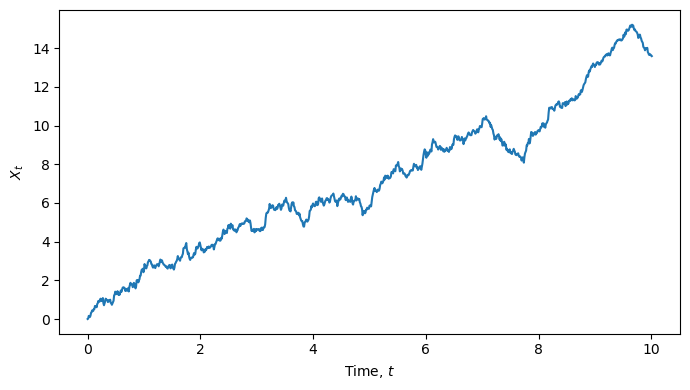

In [8]:
a_ = 1
b_ = 1

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Initial value
X0 = 0
# Integration time
tmax = 10
# timestep
dt = 0.01

X = solve_SDE_simple(X0, tmax, dt, a, b, EM_simple)

t = dt*np.arange(len(X))

# Plot the solution
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X)
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

## A slightly more advanced implementation of Euler-Maruyama

The key difference between ODE solvers and SDE solvers is the need to generate random numbers. Above, we wrote the our Euler-Maruyama implementation in such a way that it generates a new random $\Delta W$ at each step. However, in some cases we might want to generate the random numbers ahead of time, so that we can solve several times with the same realisation of $W_t$.

We will also frequently want to solve for several realisations at once, as we are usually more interested in an ensemble of solutions, rather than a single solution.

An example of a more flexible implementation of Euler-Maruyama and a solver function is shown below.

In [9]:
# An SDE solver

def EM(X, t, dt, a, b, dW=None):
    # Euler-Maruyama method, with drift a(X, t) and diffusion b(X, t)
    # Unless provided, generate random dW, Gaussian with mean=0 and variance=dt
    # and the correct number of elements
    if dW is None:
        dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=X.shape)
    # Calculate and return next value
    return X + a(X, t)*dt + b(X, t)*dW

def solve_SDE(X0, tmax, dt, a, b, solver, W=None):
    # A simple solve function (assumes dt evenly divides tmax)
    # Calculate number of timsteps (including 0 and tmax)
    Nt = int(tmax/dt) + 1
    # If X0 is not an array, turn it into a 1-element array
    if not isinstance(X0, np.ndarray):
        X0 = np.array([X0])
    # Arrays to track solution
    X = np.zeros((Nt, *X0.shape))
    X[0,:] = X0
    t = 0
    for n in range(1, Nt):
        # Call solver, with pre-computed W if available
        if W is None:
            X[n,:] = solver(X[n-1,:], t, dt, a, b)
        else:
            # Obtain increment from pre-computed Wt
            dW = W[n] - W[n-1]
            X[n,:] = solver(X[n-1,:], t, dt, a, b, dW=dW)
        t += dt
    return X

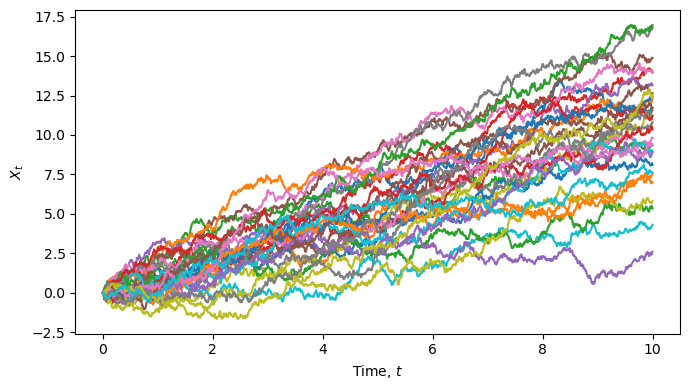

In [10]:
a_ = 1
b_ = 1

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Several initial values leads to several solutions
Np = 30
X0 = np.zeros(Np)
# Integration time
tmax = 10
# timestep
dt = 0.01

X = solve_SDE(X0, tmax, dt, a, b, EM)

t = dt*np.arange(len(X))

# Plot the solution
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X)
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

## Use pre-computed realisations of $W_t$ and compare to analytical solution

As we saw above, for an SDE with constant drift and diffusion terms, 
$$ \mathrm{d} X_t = a \, \mathrm{d}t + b \, \mathrm{d}W_t, $$
the analytical solution is
$$ X_t = X_0 + at + bW_t. $$
Note that the analytical solution at time $t$ only depends on $W_t$, and not on the individual increments.

We can also see that for such a simple SDE, the Euler-Maruyama method is in fact exact, just as the regular Euler-method is exact for the simple ODE $\dot{x} = a$, which leads to $x(t) = at$. Below we illustrate this by plotting the numerical and analytical solutions together.

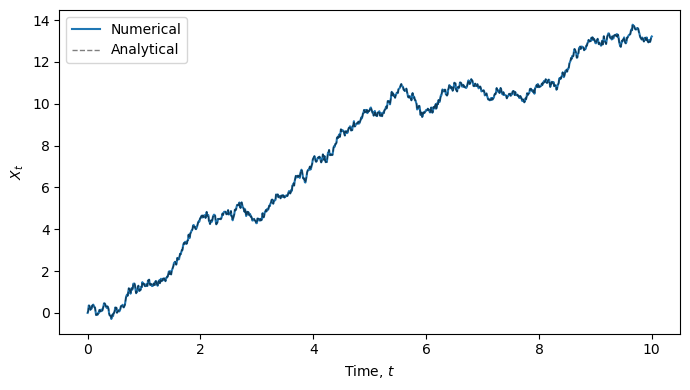

In [11]:
a_ = 1
b_ = 1

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Integration time
tmax = 10
# timestep
dt = 0.01
# Number of timesteps
Nt = int(tmax/dt) + 1

# Np Wiener processes:
Np = 1
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Np initial values
X0 = np.zeros(Np)

# Call solver with pre-computed W
X = solve_SDE(X0, tmax, dt, a, b, EM, W=W)
t = dt*np.arange(len(X))

# Plot the solution
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X, label='Numerical')

# Plot analytical solution, in this case with constant coefficients
plt.plot(t, X0 + a_*t[:,None] + b_*W, '--', c='k', lw=1, alpha=0.5, label='Analytical')

plt.legend()
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

## Use pre-computed realisations of $W_t$ and compare to analytical solution

The other example we saw above, for an SDE with drift and diffusion terms linear in $X_t$,
$$ \mathrm{d} X_t = a X_t \, \mathrm{d}t + b X_t \, \mathrm{d}W_t, $$
the analytical solution is
$$  X_t = X_0 \, \exp\left( \big(a - \frac{1}{2}b^2\big) t + b W_t\right).$$

Note that also here the analytical solution at time $t$ only depends on $W_t$, and not on the individual increments.

In this case, the numerical solution is no longer exact. Below we illustrate this by plotting the numerical and analytical solutions together.

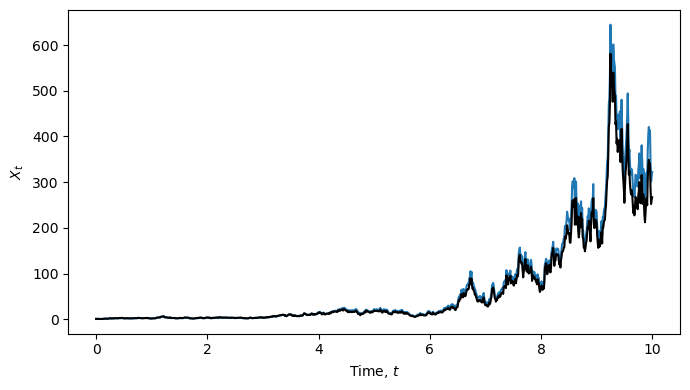

In [14]:
a_ = 1
b_ = 1

def a(X, t):
    return a_ * X

def b(X, t):
    return b_ * X

# Integration time
tmax = 10
# timestep (change to see worse or better fit)
dt = 0.01
# Number of timesteps
Nt = int(tmax/dt) + 1

# Np Wiener processes:
Np = 1
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Np initial values
X0 = np.ones(Np)

# Call solver with pre-computed W
X = solve_SDE(X0, tmax, dt, a, b, EM, W=W)
t = dt*np.arange(len(X))

# Plot the solution
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X)

# Plot analytical solution, in this case with constant coefficients
plt.plot(t, X0 * np.exp((a_-b_**2/2)*t[:,None] + b_*W), c='k')

plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

# References

Maruyama, G., Continuous Markov processes and stochastic equations. _Rend. Circ. Mat. Palermo_ 4, 48–90 (1955). https://doi.org/10.1007/BF02846028